# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Zenit Laena Fathonah
- **Email:** zenitlaena@gmail.com
- **ID Dicoding:** zntlnaa

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren jumlah total penyewaan sepeda setiap bulan dari tahun 2011 hingga 2012?
2. Bagaimana pengaruh cuaca terhadap jumlah total penyewaan sepeda selama periode 2011-2012?

## Import Semua Packages/Library yang Digunakan

Berikut adalah library yang digunakan.
- pandas : untuk memanipulasi dan menganalisis data
- matplotlib : untuk mendukung kebutuhan pembuatan visualisasi data
- seaborn : untuk membuat visualisasi data yang atraktif dan informatif

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data


Dataset yang digunakan berasal dari Kaggle dan dikenal sebagai dataset Bike Sharing. Dataset ini terdiri dari dua tabel, yaitu "day" dan "hour". Format berkas data untuk kedua tabel tersebut adalah CSV

**Memuat Tabel Day**

Untuk membaca tabel "day", kita perlu menggunakan fungsi read_csv() untuk membaca file CSV.

In [244]:
day_df = pd.read_csv("day.csv")

# Menampilkan 5 baris pertama dari DataFrame day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Memuat Tabel Hour**

Untuk membaca tabel "hour", kita perlu menggunakan fungsi read_csv() untuk membaca file CSV.

In [245]:
hour_df = pd.read_csv("hour.csv")

# Menampilkan 5 baris pertama dari DataFrame day_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Menilai Data day_df**

1. Langkah awal adalah memeriksa tipe data dari tiap kolom yang terdapat dalam day_df. Proses ini dapat dilakukan menggunakan method info() seperti kode di bawah ini.

In [246]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan hasil di atas, dapat dilihat bahwa jumlah data pada day_df lengkap atau tidak ada missing value di dalamnya. Namun, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut seharusnya direpresentasikan sebagai tipe data datetime, bukan object (tipe data string).

2. Kemudian, kita perlu memeriksa duplikasi data pada day_df.

In [247]:
print("Jumlah duplikasi pada data pada day_df: ", day_df.duplicated().sum())

Jumlah duplikasi pada data pada day_df:  0


Berdasarkan hasil di atas, dapat dilihat bahwa tidak ada duplikasi data di dalamnya.

3. Kemudian, kita perlu memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik dari kolom numerik pada sebuah DataFrame

In [248]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan hasil di atas, dapat dilihat bahwa tidak ada keanehan pada ringkasan parameter statistik tersebut.

**Menilai Data hour_df**

1. Langkah awal adalah memeriksa tipe data dari tiap kolom yang terdapat dalam hour_df. Proses ini dapat dilakukan menggunakan method info() seperti kode di bawah ini.

In [249]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil di atas, dapat dilihat bahwa jumlah data pada hour_df lengkap atau tidak ada missing value di dalamnya. Namun, terdapat kesalahan tipe data untuk kolom dteday. Kolom tersebut seharusnya direpresentasikan sebagai tipe data datetime, bukan object (tipe data string).

2. Kemudian, kita perlu memeriksa duplikasi data pada hour_df.

In [250]:
print("Jumlah duplikasi pada data pada hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada data pada hour_df:  0


Berdasarkan hasil di atas, dapat dilihat bahwa tidak ada duplikasi data di dalamnya.

3. Kemudian, kita perlu memeriksa parameter statistik dari kolom numerik yang terdapat dalam hour_df menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik dari kolom numerik pada sebuah DataFrame

In [251]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan hasil di atas, dapat dilihat bahwa tidak ada keanehan pada ringkasan parameter statistik tersebut.

### Cleaning Data

Selanjutnya, pada tahap ini, kita akan membersihkan masalah yang telah teridentifikasi dalam proses assessing data.

**Membersihkan Data day_df**

Berdasarkan hasil proses assesing data, diketahui bahwa terdapat masalah yang ditemukan dalam day_df, yaitu terdapat kesalahan tipe data untuk kolom dteday.

Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom dteday menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas. Berikut merupakan penerapannya.

In [252]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Kode di atas akan mengubah tipe data pada kolom dteday menjadi datetime. Selanjutnya, kita dapat memeriksa kembali tipe data tersebut menggunakan method info().

In [253]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Berdasarkan hasil di atas, dapat dilihat bahwa tipe data pada kolom dteday telah berubah menjadi datetime.

**Membersihkan Data hour_df**

Berdasarkan hasil proses assesing data, diketahui bahwa terdapat masalah yang ditemukan dalam hour_df, yaitu terdapat kesalahan tipe data untuk kolom dteday.

Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom dteday menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas. Berikut merupakan penerapannya.

In [254]:
hour_df['dteday']= pd.to_datetime(day_df['dteday'])

Kode di atas akan mengubah tipe data pada kolom dteday menjadi datetime. Selanjutnya, kita dapat memeriksa kembali tipe data tersebut menggunakan method info().

In [255]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Berdasarkan hasil di atas, dapat dilihat bahwa tipe data pada kolom dteday telah berubah menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore Data day_df

Pertama, kita akan mengeksplorasi data pada "day_df" terlebih dahulu. Dataset ini memuat informasi terkait jumlah total sepeda yang disewa setiap hari antara tahun 2011 dan 2012, bersama dengan informasi cuaca dan musim yang sesuai. Tabel "day_df" mencakup informasi seperti:
- instant: Record indeks
- dteday: Tanggal
- season: Musim (1: Springer, 2: Summer, 3: Fall, 4: Winter)
- yr: Tahun (0: 2011, 1: 2012)
- mnth: Bulan (1 hingga 12)
- holiday: Hari cuaca adalah libur atau tidak (0: bukan hari libur, 1: hari libur)
- weekday: Hari dalam seminggu
- workingday: Jika hari bukan akhir pekan atau libur, nilainya 1, jika tidak, nilainya 0.
- weathersit: Cuaca
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: Suhu terstandarisasi dalam Celsius
- atemp: Suhu terstandarisasi perasaan dalam Celsius
- hum: Kelembapan terstandarisasi
- windspeed: Kecepatan angin terstandarisasi
- casual: Jumlah pengguna non-terdaftar
- registered: Jumlah pengguna terdaftar
- cnt: Jumlah total sepeda yang disewa termasuk pengguna non-terdaftar dan terdaftar

**Melihat Rangkuman Parameter Statistik day_df**

Selanjutnya, kita melihat rangkuman parameter statistik dari data day_df dengan method describe() menggunakan paramter include="all" untuk menyertakan kolom non-numerik.

In [256]:
day_df.describe(include="all")

<ipython-input-256-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan rangkuman parameter statistik di atas, kita memperoleh informasi tentang total jumlah sepeda yang disewa setiap hari selama tahun 2011-2012, baik tanpa registrasi maupun dengan registrasi. Jumlah total sepeda yang disewa setiap harinya memiliki rata-rata sekitar 4504, dengan jumlah tertinggi sekitar 8714 dan terendah 22, serta standar deviasi sekitar 1937.21.

Untuk jumlah total sepeda yang disewa tanpa registrasi dalam setiap harinya, rata-ratanya adalah sekitar 848, dengan standar deviasi sekitar 686.62. Jumlah tertinggi 3410 dan terendah 2.

Sementara untuk jumlah total sepeda yang disewa dengan registrasi dalam setiap harinya, rata-ratanya adalah sekitar 3656, dengan standar deviasi sekitar 1560.26. Jumlah tertinggi 6946 dan terendah 20.

**Melihat Jumlah Sepeda yang Disewa Setiap Bulan Selama Tahun 2011-2012**

Untuk melihat jumlah sepeda yang disewa setiap bulan selama tahun 2011-2012, kita dapat menggunakan method groupby() yang diikuti method agg().

In [257]:
# Mengelompokkan data berdasarkan bulan dan tahun, dan menjumlahkan jumlah sepeda yang disewa
day_df.groupby(by=['yr', 'mnth']).agg({
    "cnt" : "sum"
})

cnt
yr mnth        
0  1      38189
   2      48215
   3      64045
   4      94870
   5     135821
   6     143512
   7     141341
   8     136691
   9     127418
   10    123511
   11    102167
   12     87323
1  1      96744
   2     103137
   3     164875
   4     174224
   5     195865
   6     202830
   7     203607
   8     214503
   9     218573
   10    198841
   11    152664
   12    123713

Berdasarkan hasil di atas, dapat dilihat jumlah sepeda yang disewa setiap bulan selama tahun 2011-2012.

**Melihat Jumlah Sepeda yang Disewa oleh Pengguna Terdaftar dan Pengguna Biasa Selama Tahun 2011-2012**

Untuk melihat jumlah sepeda yang disewa oleh pengguna biasa dan pengguna terdaftar selama tahun 2011-2012, kita dapat menggunakan method sum().

In [258]:
count_registered = day_df['registered'].sum()
count_casual = day_df['casual'].sum()

print("Total jumlah sepeda yang disewa oleh pengguna terdaftar:", count_registered)
print("Total jumlah sepeda yang disewa oleh pengguna biasa:", count_casual)


Total jumlah sepeda yang disewa oleh pengguna terdaftar: 2672662
Total jumlah sepeda yang disewa oleh pengguna biasa: 620017


Berdasarkan hasil di atas, dapat dilihat bahwa jumlah sepeda yang disewa oleh pengguna yang sudah terdaftar adalah 2672662 dan jumlah sepeda yang disewa oleh pengguna biasa adalah 620017.

**Melihat Statistik Jumlah Sepeda yang Disewa oleh Pengguna Terdaftar Per hari Selama Tahun 2011-2012**

Untuk melihat statistik jumlah sepeda yang disewa oleh pengguna terdaftar (registered) per hari selama tahun 2011-2012, kita dapat menggunakan method groupby() yang diikuti method agg().

In [259]:
day_df.groupby(by="yr").agg({
    "registered": ["max", "min", "mean", "std"]
})

registered                               
          max  min         mean          std
yr                                          
0        4614  416  2728.358904  1060.110413
1        6946   20  4581.450820  1424.331846

Berdasarkan hasil di atas, dapat dilihat bahwa rata-rata jumlah sepeda yang disewa oleh pengguna terdaftar per hari pada tahun 2011 adalah 2728.35, sedangkan pada tahun 2012 adalah 4581.45. Jumlah penyewaan sepeda tertinggi pada tahun 2011 adalah 4614 dan 2012 adalah 6946. Jumlah penyewaan sepeda terendah pada tahun 2011 adalah 416 dan tahun 2012 adalah 20.

**Melihat Statistik Jumlah Sepeda yang Disewa oleh Pengguna Biasa Per Hari Selama Tahun 2011-2012**

Untuk melihat statistik jumlah sepeda yang disewa oleh pengguna biasa (casual) per hari selama tahun 2011-2012, kita dapat menggunakan method groupby() yang diikuti method agg().

In [260]:
day_df.groupby(by="yr").agg({
    "casual": ["max", "min", "mean", "std"]
})

casual                             
      max min         mean         std
yr                                    
0    3065   9   677.402740  556.269121
1    3410   2  1018.483607  758.989897

Berdasarkan hasil di atas, dapat dilihat bahwa rata-rata jumlah sepeda yang disewa oleh pengguna biasa per hari pada tahun 2011 adalah 677.402, sedangkan pada tahun 2012 adalah 1018.48. Jumlah penyewaan sepeda tertinggi pada tahun 2011 adalah 3065 dan 2012 adalah 3410. Jumlah penyewaan sepeda terendah pada tahun 2011 adalah 9 dan tahun 2012 adalah 2.

**Melihat Persebaran Jumlah Sepeda yang Disewa Berdasarkan Musim Selama Tahun 2011-2012**

Untuk melihat persebaran jumlah sepeda yang disewa berdasarkan musim selama tahun 2011-2012, kita dapat menggunakan method groupby() dan kita urutkan nilainya menggunakan method sort_values() secara descending agar lebih mudah dilihat.

In [261]:
day_df.groupby(by="season")["cnt"].sum().sort_values(ascending=False)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa jumlah sepeda yang disewa paling banyak terjadi saat musim gugur (Fall), dengan total jumlah sepeda yang disewa adalah 1061129.

**Melihat Persebaran Jumlah Sepeda yang Disewa Berdasarkan Kondisi Cuaca Selama Tahun 2011-2012**

Untuk melihat persebaran jumlah sepeda yang disewa berdasarkan kondisi cuaca selama tahun 2011-2012, kita dapat menggunakan method groupby() dan kita urutkan nilainya menggunakan method sort_values() secara descending agar lebih mudah dilihat.

In [262]:
day_df.groupby(by="weathersit")["cnt"].sum().sort_values(ascending=False)

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa jumlah sepeda yang disewa paling banyak terjadi saat cuaca cerah, sedikit awan, dan berawan sebagian, dengan total jumlah sepeda yang disewa adalah 2257952.

**Melihat Jumlah Sepeda yang Disewa Berdasarkan Hari Kerja Selama Tahun 2011-2012**

Untuk melihat jumlah sepeda yang disewa berdasarkan hari kerja selama tahun 2011-2012, kita dapat menggunakan method groupby() dan kita urutkan nilainya menggunakan method sort_values() secara descending agar lebih mudah dilihat.

In [263]:
day_df.groupby(by="workingday")["cnt"].sum().sort_values(ascending=False)

workingday
1    2292410
0    1000269
Name: cnt, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa jumlah sepeda yang disewa paling banyak saat hari kerja dengan jumlah 2292410.

**Melihat Jumlah Sepeda yang Disewa Berdasarkan Hari Libur Selama Tahun 2011-2012**

Untuk melihat jumlah sepeda yang disewa berdasarkan hari libur selama tahun 2011-2012, kita dapat menggunakan method groupby() dan kita urutkan nilainya menggunakan method sort_values() secara descending agar lebih mudah dilihat.

In [264]:
day_df.groupby(by="holiday")["cnt"].sum().sort_values(ascending=False)

holiday
0    3214244
1      78435
Name: cnt, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa jumlah sepeda yang disewa selama tahun 2011-2012 pada hari libur sebanyak 78435. Sedangkan bukan saat hari libur sebanyak 3214244.

**Melihat Persebaran Jumlah Sepeda yang Disewa Berdasarkan Hari Dalam Satu Minggu Selama tahun 2011-2012**

Untuk melihat persebaran jumlah sepeda yang disewa berdasarkan hari dalam satu minggu selama tahun 2011-2012, kita dapat menggunakan method groupby() dan kita urutkan nilainya menggunakan method sort_values() secara descending agar lebih mudah dilihat.

In [265]:
day_df.groupby(by="weekday")["cnt"].sum().sort_values(ascending=False)

weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa jumlah sepeda yang disewa hampir sama setiap harinya selama tahun 2011-2012. Jumlah sepeda yang disewa paling banyak adalah pada saat hari Jumat (5) dengan total 487790.

### Explore Data hour_df

Pertama, kita akan mengeksplorasi data pada "hour_df" terlebih dahulu. Dataset ini memuat informasi terkait jumlah total sepeda yang disewa setiap jam antara tahun 2011 dan 2012, bersama dengan informasi cuaca dan musim yang sesuai. Tabel "hour_df" mencakup informasi seperti:
- instant: Record indeks
- dteday: Tanggal
- season: Musim (1: Springer, 2: Summer, 3: Fall, 4: Winter)
- yr: Tahun (0: 2011, 1: 2012)
- mnth: Bulan (1 hingga 12)
- hr : Jam (0 hingga 23)
- holiday: Hari cuaca adalah libur atau tidak (0: bukan hari libur, 1: hari libur)
- weekday: Hari dalam seminggu
- workingday: Jika hari bukan akhir pekan atau libur, nilainya 1, jika tidak, nilainya 0.
- weathersit: Cuaca
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: Suhu terstandarisasi dalam Celsius
- atemp: Suhu terstandarisasi perasaan dalam Celsius
- hum: Kelembapan terstandarisasi
- windspeed: Kecepatan angin terstandarisasi
- casual: Jumlah pengguna non-terdaftar
- registered: Jumlah pengguna terdaftar
- cnt: Jumlah total sepeda yang disewa termasuk pengguna non-terdaftar dan terdaftar

**Melihat Rangkuman Parameter Statistik hour_df**

Selanjutnya, kita melihat rangkuman parameter statistik dari data hour_df dengan method describe() menggunakan paramter include="all" untuk menyertakan kolom non-numerik.

In [266]:
hour_df.describe(include="all")

<ipython-input-266-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,731,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Berdasarkan rangkuman parameter statistik di atas, kita memperoleh informasi tentang total jumlah sepeda yang disewa per jam selama tahun 2011-2012, baik tanpa registrasi maupun dengan registrasi. Jumlah total sepeda yang disewa setiap jamnya memiliki rata-rata sekitar 189.46, dengan jumlah tertinggi sekitar 977 dan terendah 1, serta standar deviasi sekitar 181.38.

Untuk jumlah total sepeda yang disewa oleh pengguna biasa (casual) per jamnya, rata-ratanya adalah sekitar 35.67, dengan standar deviasi sekitar 49.30. Jumlah tertinggi 367 dan terendah 0.

Sementara untuk jumlah total sepeda yang disewa oleh pengguna terdaftar per jamnya, rata-ratanya adalah sekitar 153.78, dengan standar deviasi sekitar 151.35. Jumlah tertinggi 886 dan terendah 0.

**Melihat Jumlah Sepeda yang Disewa Berdasarkan Jam-Jam Tertentu Selama Tahun 2011-2012**

Untuk melihat jumlah sepeda yang disewa berdasarkan jam-jam tertentu selama tahun 2011-2012, kita dapat menggunakan groupby().

In [267]:
total_sewa_per_jam = hour_df.groupby('hr')['cnt'].sum()
print("Total sepeda yang disewa per jam:")
print(total_sewa_per_jam)

Total sepeda yang disewa per jam:
hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


Berdasarkan hasil di atas, dapat dilihat jumlah sepeda yang disewa pada jam-jam tertentu selama tahun 2011-2012.

**Melihat Statistik Jumlah Sepeda yang Disewa oleh Pengguna Terdaftar Per Jam Selama Tahun 2011-2012**

Untuk melihat statistik jumlah sepeda yang disewa oleh pengguna terdaftar per jam selama tahun 2011-2012, kita dapat menggunakan method groupby() yang diikuti method agg().

In [268]:
hour_df.groupby(by="yr").agg({
    "registered": ["max", "min", "mean", "std"]
})

registered                            
          max min        mean         std
yr                                       
0         567   0  115.193869  109.461014
1         886   0  191.986604  175.481637

Berdasarkan hasil di atas, dapat dilihat bahwa rata-rata jumlah sepeda yang disewa oleh pengguna terdaftar per jam pada tahun 2011 adalah 115.19, sedangkan pada tahun 2012 adalah 191.98. Jumlah penyewaan sepeda tertinggi per jam pada tahun 2011 adalah 567 dan 2012 adalah 886. Jumlah penyewaan sepeda terendah per jam pada tahun 2011 adalah 0 dan tahun 2012 adalah 0.

**Melihat Statistik Jumlah Sepeda yang Disewa oleh Pengguna Biasa Per Jam Selama Tahun 2011-2012**

Untuk melihat statistik jumlah sepeda yang disewa oleh pengguna biasa (casual) per jam selama tahun 2011-2012, kita dapat menggunakan method groupby() yang diikuti method agg().

In [269]:
hour_df.groupby(by="yr").agg({
    "casual": ["max", "min", "mean", "std"]
})

casual                          
      max min       mean        std
yr                                 
0     272   0  28.600578  38.840789
1     367   0  42.679757  56.970413

Berdasarkan hasil di atas, dapat dilihat bahwa rata-rata jumlah sepeda yang disewa oleh pengguna biasa per jam pada tahun 2011 adalah 28.6, sedangkan pada tahun 2012 adalah 42.67. Jumlah penyewaan sepeda tertinggi per jam pada tahun 2011 adalah 272 dan 2012 adalah 367. Jumlah penyewaan sepeda terendah per jam pada tahun 2011 adalah 0 dan tahun 2012 adalah 0.

**Melihat Statistik Jumlah Sepeda yang Disewa Per Jam Berdasarkan Kondisi Cuaca Selama Tahun 2011-2012**

Untuk melihat statistik jumlah sepeda yang disewa berdasarkan kondisi cuaca selama tahun 2011-2012, kita dapat menggunakan method groupby() yang diikuti method agg().

In [270]:
hour_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                            
            max min        mean         std
weathersit                                 
1           977   1  204.869272  189.487773
2           957   1  175.165493  165.431589
3           891   1  111.579281  133.781045
4           164  23   74.333333   77.925178

Berdasarkan hasil di atas, dapat dilihat bahwa rata-rata jumlah sepeda yang disewa per jam pada setiap kondisi cuaca bervariasi. Pada cuaca cerah, rata-rata mencapai 204.869. Pada cuaca berkabut, rata-rata mencapai 175.16. Pada cuaca salju ringan, rata-rata mencapai 111.57. Pada cuaca hujan lebat, rata-rata mencapai 74.3. Dengan jumlah sepeda yang disewa tertinggi pada saat cuaca cerah yaitu 977.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah total penyewaan sepeda setiap bulan dari tahun 2011 hingga 2012?

Untuk mengetahui jumlah total sepeda yang disewa setiap bulan dari tahun 2011 hingga 2012, kita dapat menggunakan method groupby() yang diikuti method agg().

In [271]:
# Mengelompokkan data day_df berdasarkan bulan dan tahun, dan menjumlahkan jumlah penyewaan sepeda
day_df.groupby(by=['yr', 'mnth']).agg({
    "cnt" : "sum"
})

cnt
yr mnth        
0  1      38189
   2      48215
   3      64045
   4      94870
   5     135821
   6     143512
   7     141341
   8     136691
   9     127418
   10    123511
   11    102167
   12     87323
1  1      96744
   2     103137
   3     164875
   4     174224
   5     195865
   6     202830
   7     203607
   8     214503
   9     218573
   10    198841
   11    152664
   12    123713

Berdasarkan hasil di atas, dapat dilihat jumlah total sepeda yang disewa setiap bulan selama tahun 2011-2012.

Untuk mempermudah dalam menyampaikan informasi tersebut, kita harus membuat visualisasi data dalam bentuk line chart. Alasannya karena line chart secara visual efektif dalam menunjukkan tren dan pola data dari waktu ke waktu. Dengan begitu, kita dapat dengan jelas melihat apakah ada peningkatan atau penurunan dalam jumlah total sepeda yang disewa setiap bulan selama dua tahun.

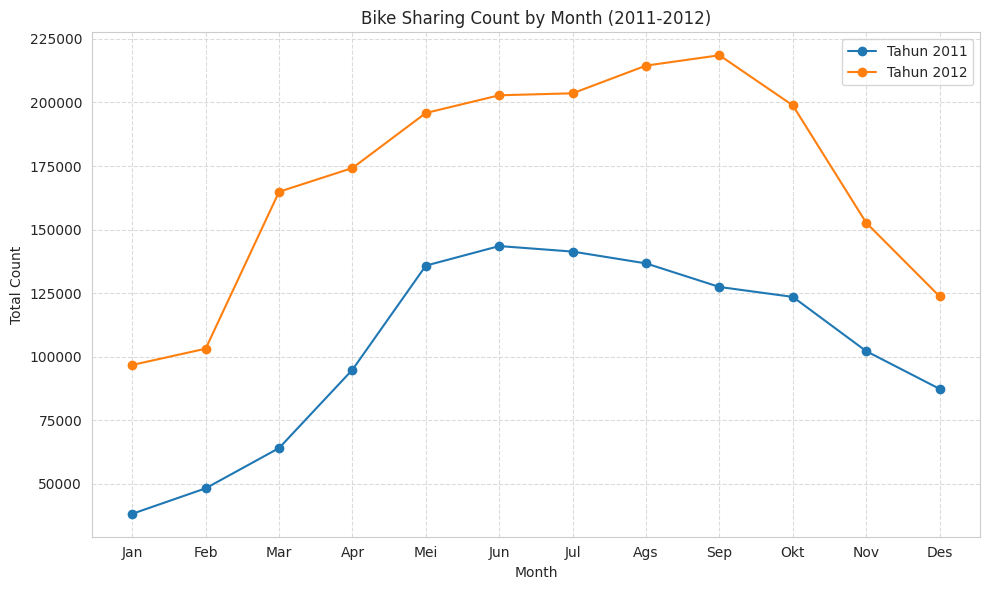

In [272]:
# Mengelompokkan data berdasarkan bulan dan tahun dengan menjumlahkan total sepeda yang disewa
monthly_counts = day_df.groupby(['yr', 'mnth'])['cnt'].sum().unstack()

# Membuat visualisasi
plt.figure(figsize=(10, 6))

# Plotting untuk setiap tahun
for year in monthly_counts.index:
    plt.plot(monthly_counts.loc[year], marker='o', label=f'Tahun {year + 2011}')

plt.title('Bike Sharing Count by Month (2011-2012)')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


 Berdasarkan visualisasi di atas, kita dapat melihat bahwa terdapat peningkatan jumlah penyewaan sepeda dari bulan Januari hingga Juni, baik pada tahun 2011 maupun 2012. Sebaliknya, pada bulan Oktober hingga Desember cenderung mengalami penurunan jumlah penyewaan sepeda, baik pada tahun 2011 mapun 2012.

### Pertanyaan 2: Bagaimana pengaruh musim terhadap jumlah total sepeda yang disewa selama tahun 2011-2012?

Untuk mengetahui jumlah total sepeda yang disewa pada musim tertentu dari tahun 2011 hingga 2012, kita dapat menggunakan method groupby() yang diikuti method agg().

In [273]:
day_df.groupby(by=['yr','season']).agg({
    "cnt" : "sum"
})

cnt
yr season        
0  1       150000
   2       347316
   3       419650
   4       326137
1  1       321348
   2       571273
   3       641479
   4       515476

Berdasarkan hasil di atas, dapat dilihat jumlah total sepeda yang disewa dari tahun 2011-2012 berdasarkan kondisi musim.

Untuk mempermudah dalam menyampaikan informasi tersebut, kita harus membuat visualisasi data dalam bentuk bar chart. Alasannya adalah karena bar chart secara visual efektif dalam menunjukkan distribusi jumlah total sepeda yang disewa pada musim tertentu selama 2 tahun. Dengan menggunakan bar chart, kita dapat dengan jelas melihat bagaimana setiap musim mempengaruhi jumlah total sepeda yang disewa.

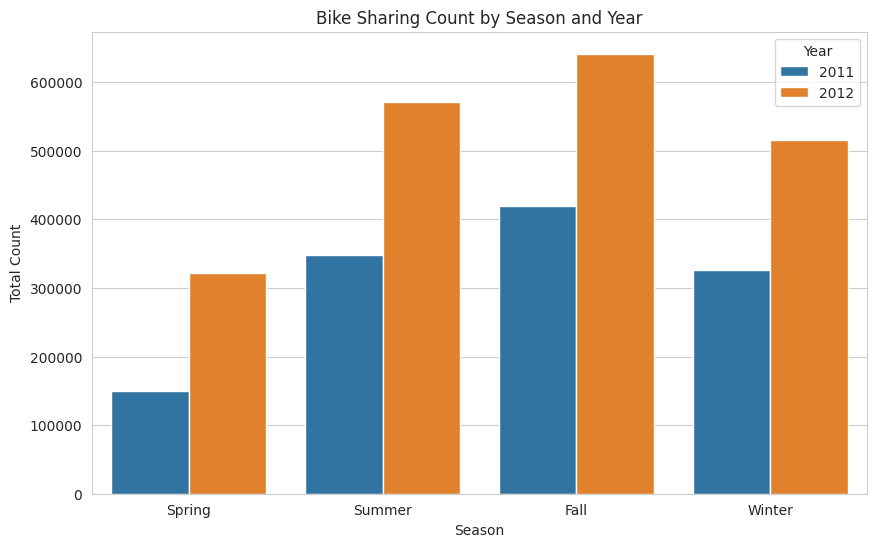

In [274]:
# Membuat Clustered Bar Chart menggunakan seaborn
plt.figure(figsize=(10, 6))

# Menentukan urutan kategori hue
hue_order = [0, 1]

# Membuat bar plot
ax = sns.barplot(data=day_df, x='season', y='cnt', hue='yr', estimator=sum, errorbar=None, hue_order=hue_order)

# Mengatur label pada sumbu x dan menentukan posisi tanda sumbu x secara eksplisit
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])

plt.title('Bike Sharing Count by Season and Year')
plt.xlabel('Season')
plt.ylabel('Total Count')

# Mengatur label pada legend
plt.legend(title='Year', labels=['2011', '2012'])

plt.show()


Berdasarkan visualisasi di atas, dapat dilihat bahwa jumlah penyewaan sepeda cenderung lebih rendah selama musim semi dibandingkan dengan musim-musim lainnya, baik pada tahun 2011 maupun 2012. Sebaliknya, jumlah penyewaan sepeda cenderung lebih tinggi selama musim gugur, baik pada tahun 2011 maupun 2012.

## Conclusion

- Conclution pertanyaan 1 : Bagaimana tren jumlah total penyewaan sepeda setiap bulan dari tahun 2011 hingga 2012?

Berdasarkan proses analisis data yang telah dilakukan, bahwa terdapat peningkatan jumlah penyewaan sepeda dari bulan Januari hingga Juni, baik pada tahun 2011 maupun 2012. Sebaliknya, pada bulan September hingga Desember cenderung mengalami penurunan, baik pada tahun 2011 mapun 2012.

- Conclution pertanyaan 2: Bagaimana pengaruh musim terhadap jumlah total sepeda yang disewa selama tahun 2011-2012?

Berdasarkan proses analisis data yang telah dilakukan, bahwa jumlah penyewaan sepeda cenderung lebih rendah selama musim semi (Spring) dibandingkan dengan musim-musim lainnya, baik pada tahun 2011 maupun 2012. Sebaliknya, jumlah penyewaan sepeda cenderung lebih tinggi selama musim gugur (Fall), baik pada tahun 2011 maupun 2012.